# LAB 2

In [1]:
import cv2  # pip install
import numpy as np  # pip install
import glob
import matplotlib.pyplot as plt # pip install
from scipy.spatial import distance as dist  # pip install

from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import random

In [2]:
images = {}
index = {}
for path in glob.glob("./data/*.jpg"):
#     print(path)
    image = cv2.imread(path)
    filename = path.split("\\")[-1]
    images[filename] = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    hist = cv2.calcHist([image],[0,1,2],None,[8,8,8],[0,256,0,256,0,256])
    hist = cv2.normalize(hist,hist).flatten()
    index[filename] = hist
    print(filename)

hulk.jpg
ironman.jpg
magnetto.jpg
spiderman.jpg
venom.jpg
wolverine.jpg
wonderwoman.jpg
wonderwoman2.jpg


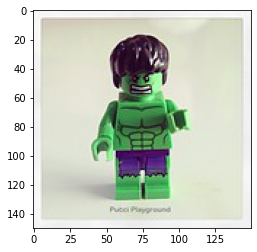

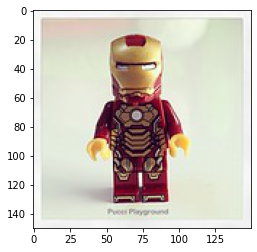

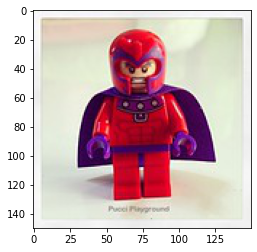

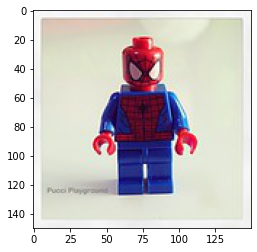

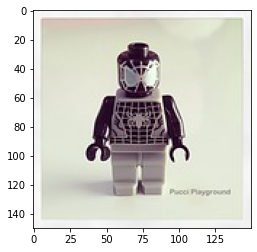

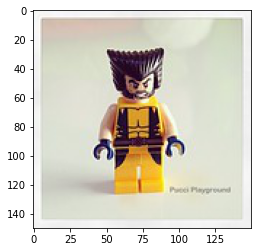

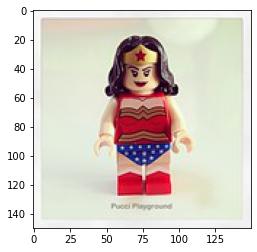

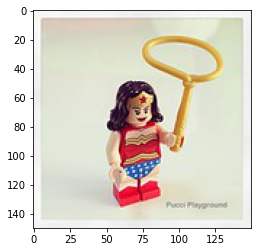

In [3]:
for k,v in images.items():
    plt.figure()
    plt.imshow(v)

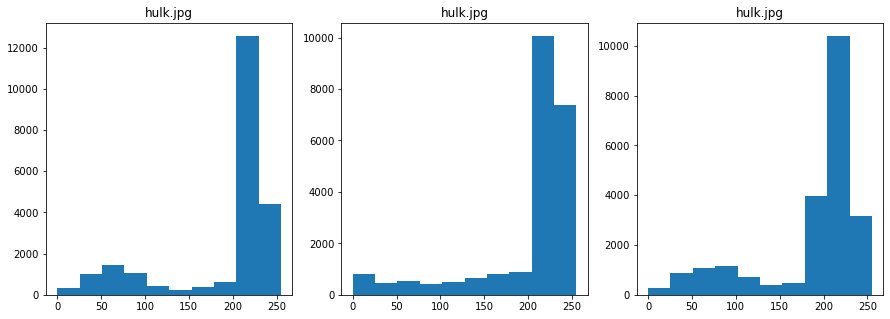

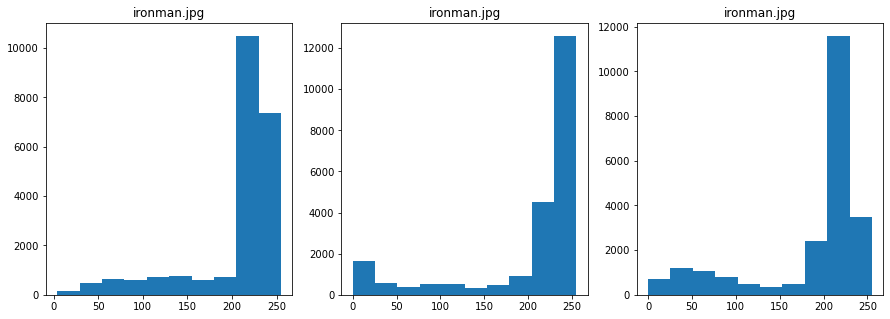

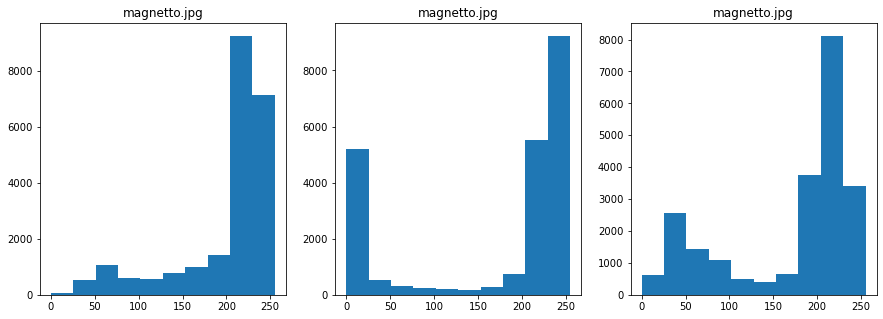

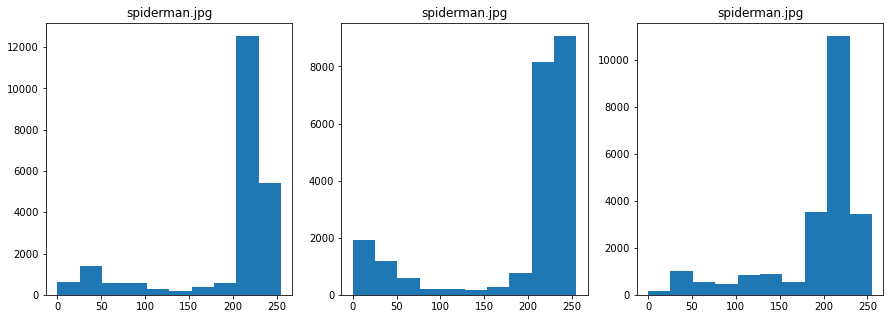

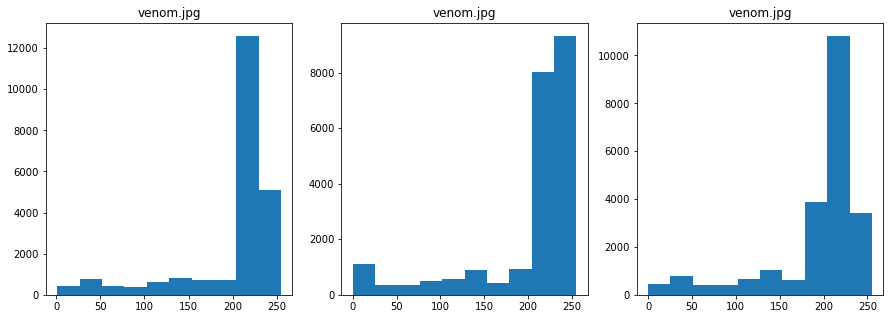

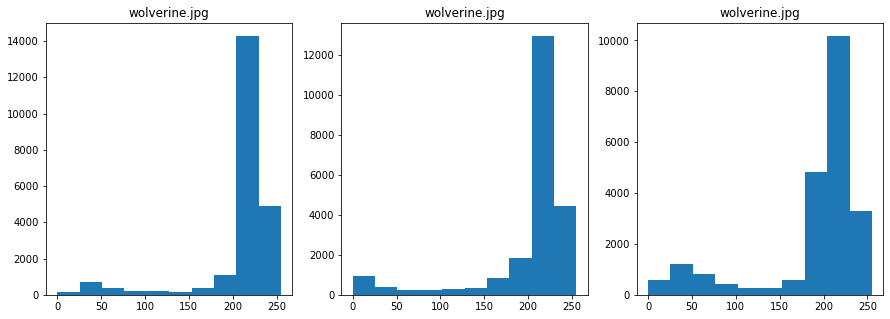

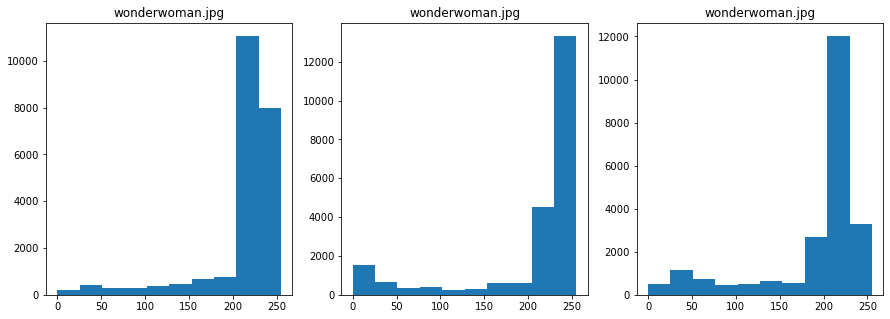

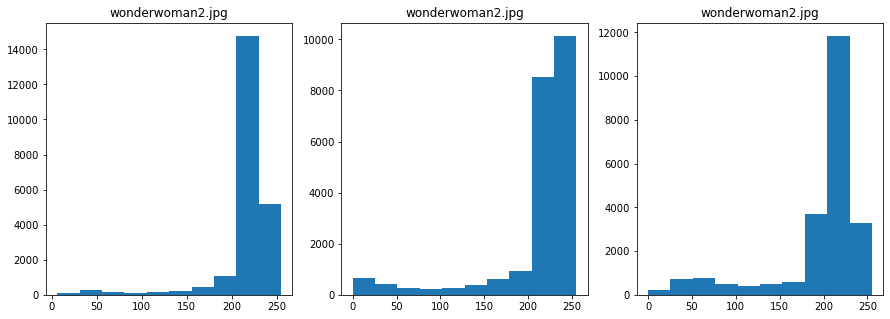

In [4]:
for k,v in images.items():
    plt.figure(figsize=(15,5))
    ax1 = plt.subplot(1,3,1)
    ax1.set_title(k)
    ax1.hist(v[:,:,0].flatten())
    ax2 = plt.subplot(1,3,2)
    ax2.set_title(k)
    ax2.hist(v[:,:,1].flatten())
    ax3 = plt.subplot(1,3,3)
    ax3.set_title(k)
    ax3.hist(v[:,:,2].flatten())    

Euc <function euclidean at 0x000001A7EA960160>
Taxi <function cityblock at 0x000001A7EA9605E0>


<ipython-input-6-3b01eae43995>:16: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = figure.add_subplot(1,1,1)


Cheb <function chebyshev at 0x000001A7EA960700>


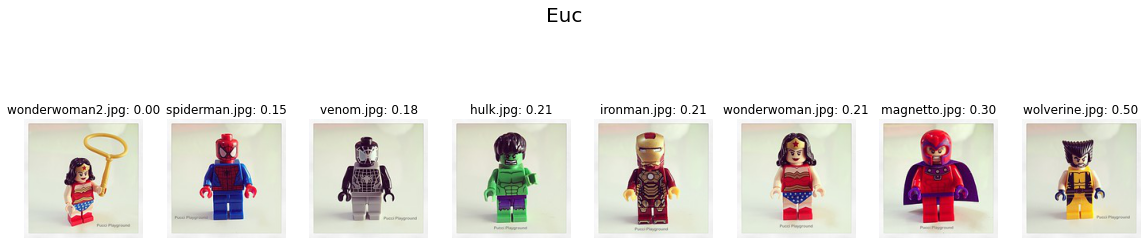

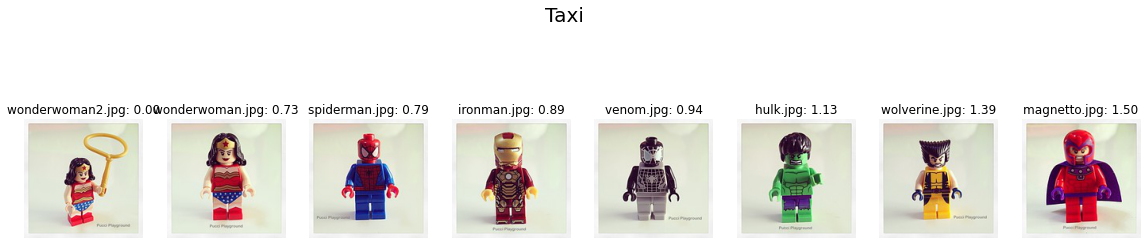

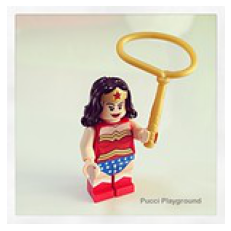

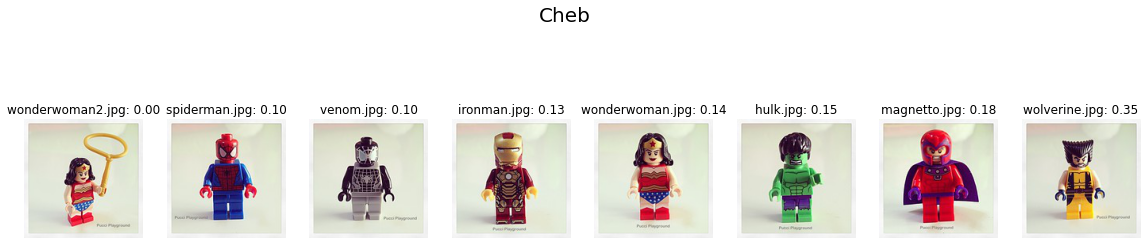

In [6]:
METRICS = (
    ("Euc",dist.euclidean),
    ("Taxi",dist.cityblock),
    ("Cheb",dist.chebyshev)
)

for name,method in METRICS:
    print(name,method)
    result = {}
    for k,hist in index.items():
        d = method(index["wonderwoman2.jpg"], hist)
        result[k] = d
    result = sorted([(v,k) for k,v in result.items()])
#     print(result)
    figure = plt.figure("Query")
    ax1 = figure.add_subplot(1,1,1)
    ax1.imshow(images["wonderwoman2.jpg"])
    plt.axis("off")
    fig = plt.figure("Results: %s" % (name), figsize=(20,5))
    fig.suptitle(name, fontsize = 20)
    for i,(v,k) in enumerate(result):
        ax = fig.add_subplot(1, len(images),i+1)
        ax.set_title("%s: %.2f" % (k,v))
        plt.imshow(images[k])
        plt.axis("off")
        

# HOMEWORK

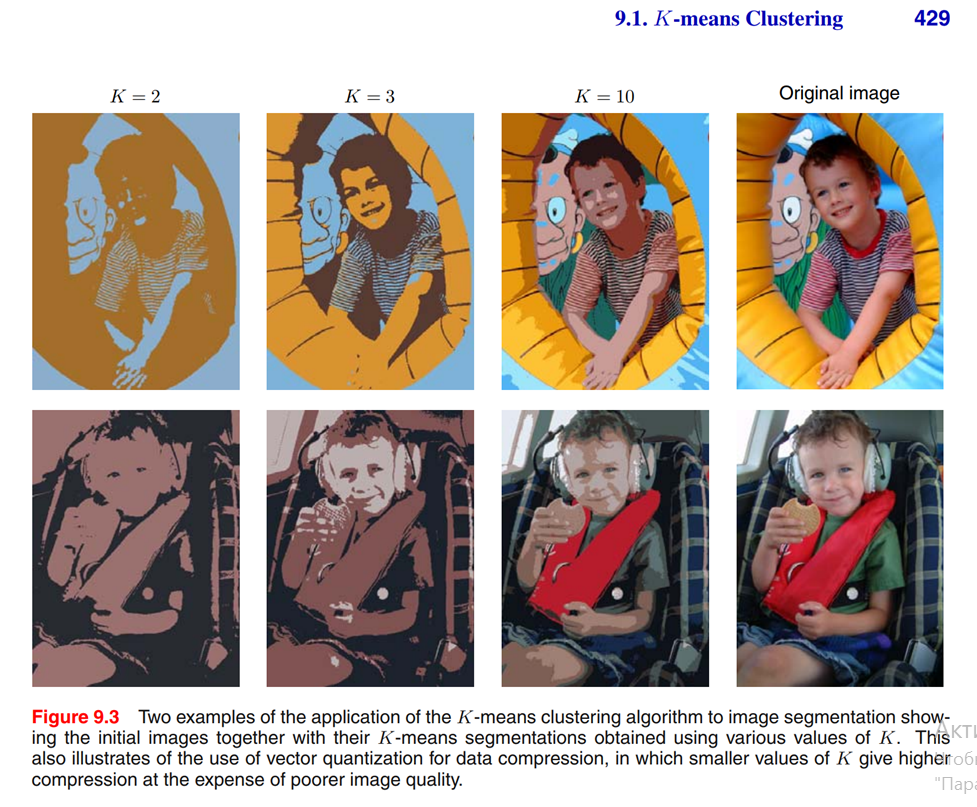

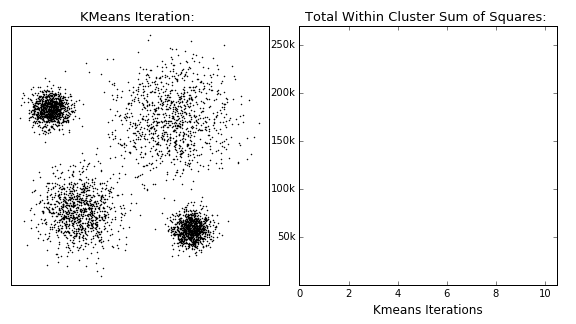

## Introduction to K-Means Clustering
* Step 1: Choose the number of clusters k. ...
* Step 2: Select k random points from the data as centroids. ...
* Step 3: Assign all the points to the closest cluster centroid. ...
* Step 4: Recompute the centroids of newly formed clusters. ...
* Step 5: Repeat steps 3 and 4.

### Task
* Read 9.1 - KMeans of Bishop book

* Develop the code of the K-means clustering algorithm for Image Segmentation. In Fig.9.3 you can see an example of the final processing result. You should use only the NumPy library. Test your implementation against k = [2,3,10]. Visualize your result. Write a conclusion about the complexity of your implementation and the quality of image compression. Don't use copy-past from the internet, cause it deserves zero marks.


In [3]:
class KMeans:
    
    def __init__(self, n_clusters, iters=300):
        self.n_clusters = n_clusters
        self.iters = iters
    
    def fit(self, X):
        self.X = X
        
        # k seed points that we want to make centers
        points = random.choices(list(X), k=self.n_clusters) 
        
        # create clusters corresponding to seed points
        self.clusters = []
        for point in points:
            cluster = Cluster(point)
            self.clusters.append(cluster)
        
        for _ in range(self.iters):
            
            self.labels_ = []
            
            for point in X:
                distances = []
                for cluster in self.clusters:
                    dis = cluster.distance(point)
                    distances.append((dis, cluster))
                
                distances_np = np.array(distances)
                
                min_index = np.argmin(distances_np[:, 0].astype(int))
                selected = self.clusters[min_index]
                selected.points.append(point)
                self.labels_.append(min_index)
            
            for cluster in self.clusters:
                cluster.update_center()
    

    
class Cluster:
    
    def __init__(self,center):
        self.center = center
        self.points = []
        
    def distance(self, point):
        return np.sum((self.center-point)**2)
    
    def update_center(self):
        points = np.array(self.points)
        self.center = np.mean(points, axis=0)
        self.points = []

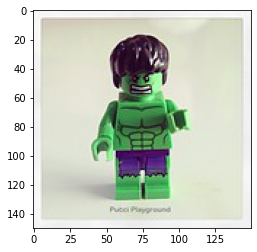

In [8]:
img = cv2.imread("hulk.jpg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

In [9]:
img.shape

(150, 150, 3)

In [10]:
X = img.reshape(-1,3)

In [11]:
second = X.reshape(img.shape)

In [12]:
second.shape

(150, 150, 3)

In [13]:
X.shape

(22500, 3)

In [70]:
model = KMeans(2, 10)

In [71]:
model.fit(X)

In [72]:
color_pellet = model.clusters

In [73]:
centers = []
for cluster in color_pellet:
    centers.append(cluster.center)
centers = np.array(centers)

In [74]:
centers.shape

(2, 3)

In [75]:
centers

array([[ 65.93604651,  95.31069767,  73.60139535],
       [223.2671978 , 226.85489011, 211.76868132]])

In [76]:
gen = np.zeros([X.shape[0],3])

In [77]:
for i in range(len(gen)):
    gen[i] = model.clusters[model.labels_[i]].center
#     gen[i] = model.labels_[i].centers
gen = gen.reshape(img.shape)

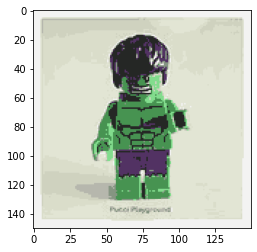

In [60]:
#K=10
plt.imshow(gen/255)

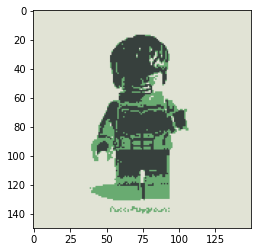

In [69]:
#K=3
plt.imshow(gen/255)

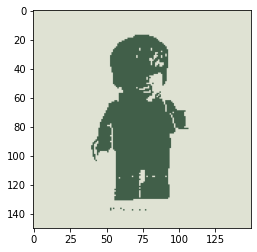

In [78]:
#K=2
plt.imshow(gen/255)